# 利用 Paddle Quantum 的 state 模块操作量子态

_Copyright (c) 2023 Institute for Quantum Computing, Baidu Inc. All Rights Reserved._

`state` 模块是量桨封装的支持量子态（`paddle_quantum.state.State`）相关操作的模块，主要包括了量子态的创建和运算。`state` 模块为用户提供了诸多接口，用于创建、编辑量子态和与量子电路交互、测量。

## 量子态的创建
用户可以通过已有数据创建量子态，也可通过量桨创建特殊类型的量子态。
首先我们可以根据已有数据创建量子态。

In [1]:
import paddle
import paddle_quantum as pq
from paddle_quantum.backend import Backend

state_vec = pq.state.to_state([1, 0])
print(state_vec)

/Applications/anaconda3/envs/pq/lib/python3.8/site-packages/openfermion/hamiltonians/hartree_fock.py:11: DeprecationWarning: Please use `OptimizeResult` from the `scipy.optimize` namespace, the `scipy.optimize.optimize` namespace is deprecated.
  from scipy.optimize.optimize import OptimizeResult
/Applications/anaconda3/envs/pq/lib/python3.8/site-packages/paddle/tensor/creation.py:125: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if data.dtype == np.object:


[1.+0.j 0.+0.j]


/Applications/anaconda3/envs/pq/lib/python3.8/site-packages/paddle/tensor/creation.py:125: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if data.dtype == np.object:
/Applications/anaconda3/envs/pq/lib/python3.8/site-packages/paddle/fluid/framework.py:1104: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  elif dtype == np.bool:


也可以通过指定 `backend` 创建密度矩阵。

In [2]:
state_density = pq.state.State([[0.5, 0], [0, 0.5]], backend=Backend.DensityMatrix)
print(state_density)

[[0.5+0.j 0. +0.j]
 [0. +0.j 0.5+0.j]]


我们也可以通过量桨内置的函数创建特殊类型的量子态。比如创建单比特零态。

In [3]:
print(pq.state.zero_state(num_qubits=1))

[1.+0.j 0.+0.j]


创建两比特随机态。

In [4]:
print(pq.state.random_state(num_qubits=2))

[-0.0477975 -0.521988j   -0.21298088+0.06160466j  0.4515487 +0.19628459j
  0.625157  +0.20698515j]


此外，量桨还支持其它若干特殊量子态的创建，详见[API 文档](https://qml.baidu.com/api/paddle_quantum.state.common.html)。

我们也可以通过一行代码设置全局后端为密度矩阵。当然，我们继续使用默认后端，即态矢量，进行演示。

In [5]:
pq.set_backend('density_matrix') # 设置全局后端为密度矩阵
print(pq.state.zero_state(num_qubits=1))
pq.set_backend('state_vector')  # 设置回默认后端

[[1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j]]


## 量子态的数据
我们可以通过访问 `data`，`ket`，`bra` 来读取 `State` 中的数据。

In [6]:
zero_state = pq.state.zero_state(num_qubits=1)
print('Its data is :', zero_state.data)
print('Its ket is :', zero_state.ket)
print('Its bra is :', zero_state.bra)

Its data is : Tensor(shape=[2], dtype=complex64, place=Place(cpu), stop_gradient=True,
       [(1+0j), 0j    ])
Its ket is : Tensor(shape=[2, 1], dtype=complex64, place=Place(cpu), stop_gradient=True,
       [[(1+0j)],
        [0j    ]])
Its bra is : Tensor(shape=[1, 2], dtype=complex64, place=Place(cpu), stop_gradient=True,
       [[(1-0j), -0j   ]])


我们也可以通过成员函数 `numpy()` 来输出 `State` 的 `numpy.ndarray` 类型数据。

In [7]:
print(zero_state.numpy())

[1.+0.j 0.+0.j]


## 量子态的运算
我们可以通过矩阵乘法 `@` 求两个量子态的乘积。这方便求取量子态的重叠。

In [8]:
state_1 = pq.state.zero_state(num_qubits=1, backend=Backend.DensityMatrix)
state_2 = pq.state.to_state([[0, 0], [0, 1]], backend=Backend.DensityMatrix)
print(state_1 @ state_2)
print('The overlap of state_1 and state_2 is :', paddle.trace(state_1 @ state_2))

Tensor(shape=[2, 2], dtype=complex64, place=Place(cpu), stop_gradient=True,
       [[0j, 0j],
        [0j, 0j]])
The overlap of state_1 and state_2 is : Tensor(shape=[1], dtype=complex64, place=Place(cpu), stop_gradient=True,
       [0j])


也可以使用 `State.kron()` 求得量子态 $\rho$ 和 $\sigma$ 的张量积 $\rho \otimes \sigma$。

In [9]:
rho = pq.state.zero_state(num_qubits=1)
sigma = pq.state.to_state([0, 1])
product_state = rho.kron(sigma)
print(product_state)

[0.+0.j 1.+0.j 0.+0.j 0.+0.j]


还可以通过索引或切片的方式对量子态求偏迹。如我们想要获取 $|011\rangle$ 的第一个比特，和 第二、三个比特的量子态。

In [10]:
psi_012 = pq.state.computational_basis(num_qubits=3, index=3)
print(psi_012)

psi_1 = psi_012[0]
psi_12 = psi_012[1:]
print('the state of the first qubit is :', psi_1)
print('the state of the second and third qubits is :', psi_12)

[0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
the state of the first qubit is : [1.+0.j 0.+0.j]
the state of the second and third qubits is : [0.+0.j 0.+0.j 0.+0.j 1.+0.j]


## 量子态的测量与演化
量子态的成员函数 `State.evolve()` 可以在给定哈密顿量 $H$ 和演化时间 $t$ 的情况下，给出量子态在 $e^{-iHt}$ 演化下的末态。这里我们设置哈密顿量为泡利 $Z$ 矩阵，演化时间 $t=1$。

In [11]:
state = pq.state.zero_state(num_qubits=1)
t = 1
hamiltonian = pq.hamiltonian.Hamiltonian([(1, 'Z0')])
state.evolve(H=hamiltonian, t=t)
print(state)

[0.5403023-0.84147096j 0.       +0.j        ]


量子态的成员函数 `State.expec_val()` 可以求取在给定可观测量（哈密顿量）下的期望值。

In [12]:
state = pq.state.zero_state(num_qubits=1)
observable = pq.hamiltonian.Hamiltonian([(1, 'Z0')])
print(state.expec_val(hamiltonian=observable))

1.0


量子态的成员函数 `State.measure()` 可以获取在计算基下的测量结果。用户可以设置 `shots` 数值来模拟或令 `shots=0` 求期望，也可以使用 `plot` 参数作图。

Theoretical value is : {'0': 0.5, '1': 0.5}


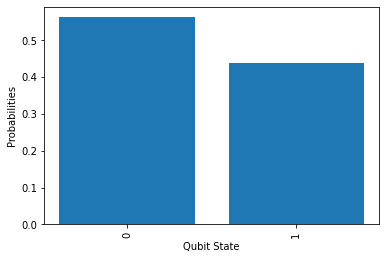

{'0': 0.5625, '1': 0.4375}

In [13]:
state = pq.state.to_state([[0.5, 0], [0, 0.5]], backend=Backend.DensityMatrix)
print('Theoretical value is :', state.measure(shots=0))  # theoretical value
state.measure(shots=16, plot=True)